## Laboratorium 1


### Przypomnienie

1. Z jakich etapów składa się cykl budowy procesu uczenia maszynowego?

2. Jakie znacie:
-  modele uczenia maszynowego?
-  techniki preprocessingu?
-  techniki postprocessingu?

3. Wykorzystując dane `breast_cancer` (jest dostępny w pakiecie `scikit-learn`) zbuduj 3 rodzaje modeli ML korzystając z biblioteki `scikit-learn`. Pamiętaj o podziale na zbiór treningowy i testowy, lub zastosuj kroswalidację. Zwaliduj otrzymane modele odpowiednią metryką. Zwróć uwagę na potencjalne przeuczenie.





In [23]:
### Import packages
import pandas as pd
import numpy as np

### Load data
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
y = data.target
X = pd.DataFrame(data.data)

In [24]:
### Train & test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Build models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)

SVC = SVC()
SVC.fit(X_train, y_train)



SVC()

In [25]:
### Validation
y_pred_test_tree = Tree.predict(X_test)
y_pred_test_svc = SVC.predict(X_test)

from sklearn.metrics import accuracy_score, recall_score, precision_score
print("Tree")
print("accuracy: ", accuracy_score(y_test, y_pred_test_tree))
print("accuracy: ", recall_score(y_test, y_pred_test_tree))
print("accuracy: ", precision_score(y_test, y_pred_test_tree))


print("SVC")
print("accuracy: ", accuracy_score(y_test, y_pred_test_svc))
print("accuracy: ", recall_score(y_test, y_pred_test_svc))
print("accuracy: ", precision_score(y_test, y_pred_test_svc))


Tree
accuracy:  0.9298245614035088
accuracy:  0.9714285714285714
accuracy:  0.918918918918919
SVC
accuracy:  0.9035087719298246
accuracy:  0.9714285714285714
accuracy:  0.8831168831168831


4. Czym są parametry modelu a czym hiperparametry? Podaj przykłady występujące we wspomnianych wcześniej algorytmach.

### Pipeline

Możemy budować skomplikowany łańcuch operacji złożony z metod preprocessingu, algorytmów ML i postprocessingu. 


To build a composite estimator, transformers are usually combined with other transformers or with predictors (such as classifiers or regressors). The most common tool used for composing estimators is a Pipeline.

Pipelines require all steps except the last to be a transformer. The last step can be anything, a transformer, a predictor, or a clustering estimator which might have or not have a .`predict(...)` method. **A pipeline exposes all methods provided by the last estimator: if the last step provides a transform method, then the pipeline would have a transform method and behave like a transformer. If the last step provides a predict method, then the pipeline would expose that method, and given a data X, use all steps except the last to transform the data, and then give that transformed data to the predict method of the last step of the pipeline.** 

The class Pipeline is often used in combination with ColumnTransformer or FeatureUnion which concatenate the output of transformers into a composite feature space. TransformedTargetRegressor deals with transforming the target (i.e. log-transform y).

Więcej informacji https://scikit-learn.org/stable/modules/compose.html

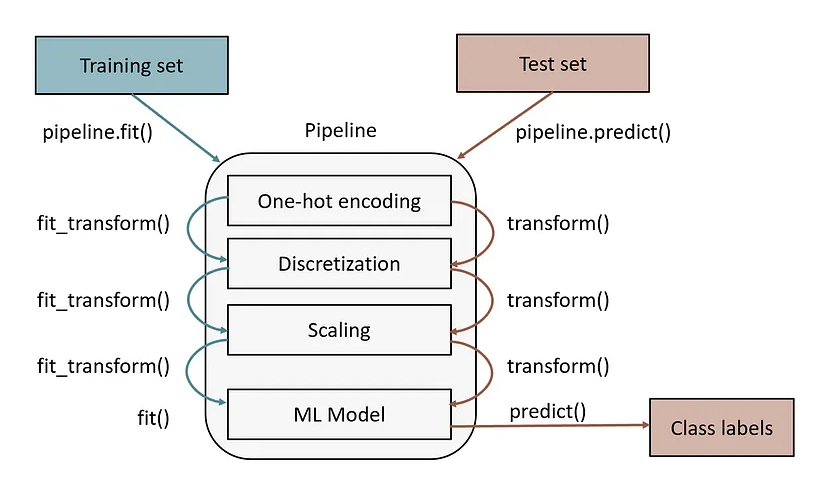


#### Zadanie 1

Wykorzystując bibliotekę  `scikit-learn` i moduł `pipeline` zbuduj pipeline dla danych `train` and `test`. Pamiętaj, że w tym przypadku mamy do czynienia z problemem regresji.




In [26]:
#### Solution
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.ensemble import RandomForestClassifier

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer()),
    ('scale', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer()),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])


col_trans = ColumnTransformer([
    ('num_pipeline', num_pipeline, make_column_selector(dtype_include = np.number)),
    ('cat_pipeline', cat_pipeline, make_column_selector(dtype_include = np.object_))
])

model_pipeline = Pipeline([('preprocessing', col_trans),
                           ('model', RandomForestClassifier())])



In [27]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B8301FFFD0>),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B8301A0710>)])),
                ('model', RandomForestClassifier())])

In [28]:
y_pred_model_pipeline = model_pipeline.predict(X_test)

In [29]:
print("Model Pipeline")
print("accuracy: ", accuracy_score(y_test, y_pred_model_pipeline))
print("accuracy: ", recall_score(y_test, y_pred_model_pipeline))
print("accuracy: ", precision_score(y_test, y_pred_model_pipeline))


Model Pipeline
accuracy:  0.9649122807017544
accuracy:  0.9714285714285714
accuracy:  0.9714285714285714


### Zadanie 2


a) Stwórz pipeline który może działać na różnym rodzaju danych do problemu klasyfikacji binarnej. Podpowiedzią mogą być poniższe punkty:

1. Define sets of columns to be transformed in different ways
2. Split data to train and test sets
3. Create pipelines for numerical and categorical features
4. Create ColumnTransformer to apply pipeline for each column set
5. Add a model to a final pipeline
6. Display the pipeline
7. Pass data through the pipeline


b) Tak stworzony pipeline można wykorzystać w funkcji `GridSearchCV` do optymalizacji hiperparametrów modelu. Przeprowdź tę operację

c) Jak zmodyfikować ten pipeline aby wybierać najlepszą metodę preprocessingu dla określonych danych?

Przetestuj pipeline na danych https://www.openml.org/search?type=data&status=active&id=45068

In [ ]:
import openml

# List all datasets and their properties
openml.datasets.list_datasets(output_format="dataframe")

# Get dataset by ID
dataset = openml.datasets.get_dataset(45068)

X, _, _, _ = dataset.get_data(dataset_format="dataframe")
y = X.loc[:, 'class']
X = X.drop(['class'], axis = 1)
print('Dane X', X.head())
print('Target: ', y.head())